# FACIAL EMOTION RECOGNITION

---

> Berkay R. Gülşen

> 217CS2009


### Imports

In [ ]:
import math
import numpy as np
import pandas as pd


import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils

### Reading data from memory and splitting into training, validation and test sets



In [ ]:
#read dataset
data=pd.read_csv('fer2013.csv')
data

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [ ]:
img_array = data.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))
img_array = np.stack(img_array, axis=0)

In [ ]:
img_array.shape

(35887, 48, 48, 1)

In [ ]:
le = LabelEncoder()
img_labels = le.fit_transform(data.emotion)
img_labels = np_utils.to_categorical(img_labels)
img_labels.shape

(35887, 7)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(img_array, img_labels,
                                                    shuffle=True, test_size=0.2)
X_test, X_valid, Y_test, Y_valid = train_test_split(X_test, Y_test,
                                                    shuffle=True, test_size=0.3)

print("Train shape: ", X_train.shape)
print("Test shape: ", X_test.shape)
print("Validation shape: ", X_valid.shape)

Train shape:  (28709, 48, 48, 1)
Test shape:  (5024, 48, 48, 1)
Validation shape:  (2154, 48, 48, 1)


Normalize train and validation data by 255 as neural networks are very sensitive to unnormalize data.


In [ ]:
X_train = X_train / 255.
X_valid = X_valid / 255.
X_test = X_test/255

Increasing data augmentation parameters such as horizontally and vertically shifting images up to 20% and rotating images up to 10% to increase traing sample.

In [ ]:
gen2 = ImageDataGenerator(rotation_range=10,
                          width_shift_range=0.2, #!
                          height_shift_range=0.2, #!
                          shear_range = 0.2,
                          horizontal_flip = True,
                          zoom_range=0.2)

### Building and training CNN network

VGG architectured model which consist of 4 convolutional stages and 3 fully connected layer. Each convolutional stage consist of 2 convolutional blocks with Batch normalizationa and relu activation and Maxpooling.

In [ ]:
model2 = Sequential()                                

## Convolutional Layer 1
## ---------------------
# Convolution Block 1
model2.add(Conv2D(64, (3, 3), input_shape=(48,48,1))) 
model2.add(BatchNormalization())
model2.add(Activation('relu'))

# Convolution Block 2
model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model2.add(Dropout(0.2))


## Convolutional Layer 2
## ---------------------
# Convolution Block 1
model2.add(Conv2D(128, (3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))

# Convolution Block 2
model2.add(Conv2D(128, (3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model2.add(Dropout(0.25))


## Convolutional Layer 3
## ---------------------
# Convolution Block 1
model2.add(Conv2D(256, (3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))

# Convolution Block 2
model2.add(Conv2D(256, (3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model2.add(Dropout(0.3))


## Convolutional   Layer 4
## ---------------------
# Convolution Block 1
model2.add(Conv2D(512, (3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))

# Convolution Block 2
model2.add(Conv2D(256, (3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model2.add(Dropout(0.35))
    
    
model2.add(Flatten())                                 

# Fully Connected Layer 6
model2.add(Dense(128))                                
model2.add(BatchNormalization())                      
model2.add(Activation('relu'))                        

# Fully Connected Layer 7                                                
model2.add(Dense(64))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.4))

# Fully Connected Layer 8                                                     
model2.add(Dense(7))                                 
model2.add(Activation('softmax'))  

model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
batch_normalization_30 (Batc (None, 46, 46, 64)        256       
_________________________________________________________________
activation_33 (Activation)   (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_31 (Batc (None, 46, 46, 64)        256       
_________________________________________________________________
activation_34 (Activation)   (None, 46, 46, 64)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 23, 23, 64)       

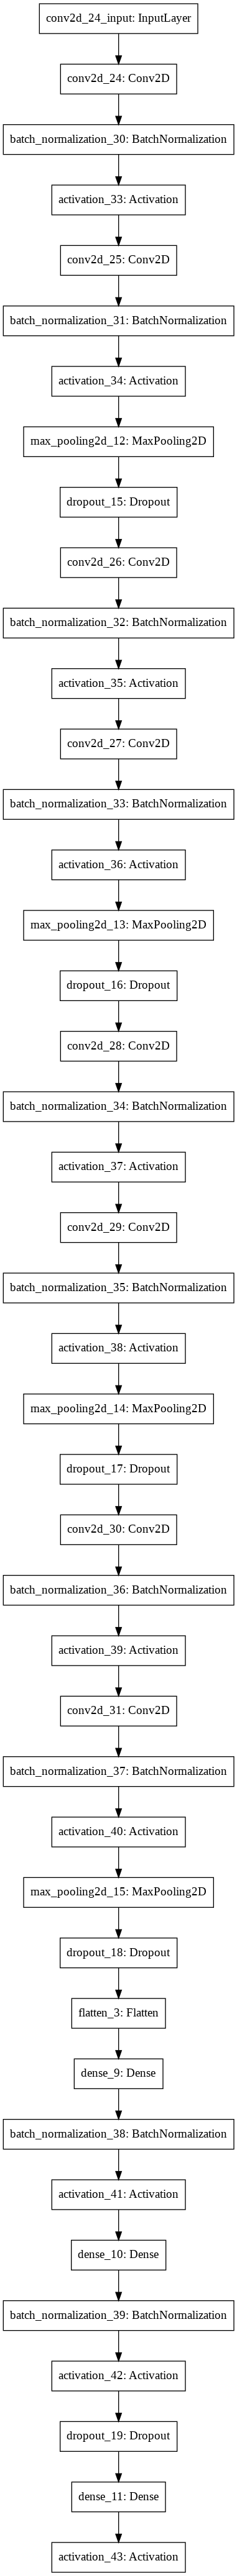

In [ ]:
keras.utils.plot_model(model2)

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer= optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
#Early stopping to stop training if there is no improvement in last 11 epochs
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True)

#RLRP scheduler to factor learning rate by 0.75 if there is no improvement in last 5 epochs
lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.75,
    patience=5,
    min_lr=1e-7,
    verbose=1)

callbacks = [early_stopping, lr_scheduler]

model2_hist = model2.fit(gen2.flow(X_train, Y_train, 32), 
                  steps_per_epoch = len(X_train)/32, 
                  epochs=100, 
                  callbacks = callbacks,
                  use_multiprocessing = True,
                  validation_data=(X_valid,Y_valid))

Epoch 1/100
897/897 [==============================] - 25s 27ms/step - loss: 1.7978 - accuracy: 0.2548 - val_loss: 3.4190 - val_accuracy: 0.1133
Epoch 2/100
897/897 [==============================] - 24s 26ms/step - loss: 1.7005 - accuracy: 0.3020 - val_loss: 1.7619 - val_accuracy: 0.2841
Epoch 3/100
897/897 [==============================] - 24s 27ms/step - loss: 1.5601 - accuracy: 0.3817 - val_loss: 1.4741 - val_accuracy: 0.4280
Epoch 4/100
897/897 [==============================] - 24s 27ms/step - loss: 1.4508 - accuracy: 0.4373 - val_loss: 1.3818 - val_accuracy: 0.4698
Epoch 5/100
897/897 [==============================] - 24s 27ms/step - loss: 1.3827 - accuracy: 0.4725 - val_loss: 1.3730 - val_accuracy: 0.4991
Epoch 6/100
897/897 [==============================] - 24s 27ms/step - loss: 1.3371 - accuracy: 0.4923 - val_loss: 1.1985 - val_accuracy: 0.5483
Epoch 7/100
897/897 [==============================] - 24s 27ms/step - loss: 1.2995 - accuracy: 0.5084 - val_loss: 1.1868 - val_ac

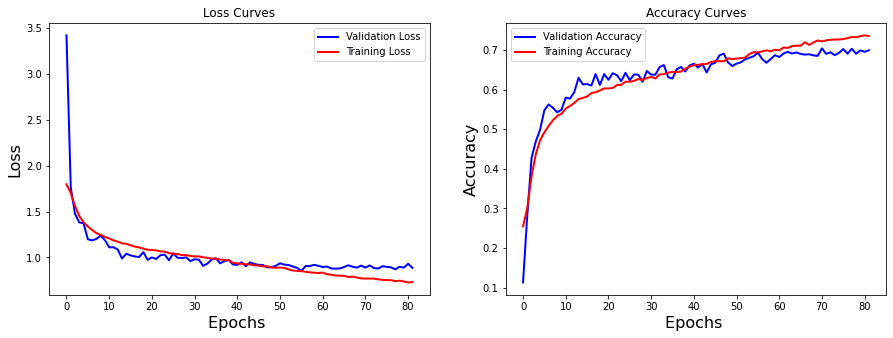

In [ ]:
#plotting the results
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1,2,figsize=(15, 5))
training_loss, training_accuracy, validation_loss, validation_accuracy, lr = model2_hist.history.items()

axes[0].plot(validation_loss[1], "b-", linewidth=2.0)
axes[0].plot(training_loss[1], "r-", linewidth=2.0)
axes[0].legend(['Validation Loss', 'Training Loss'])
axes[0].set_xlabel('Epochs ',fontsize=16)
axes[0].set_ylabel('Loss',fontsize=16)
axes[0].set_title('Loss Curves')

axes[1].plot(validation_accuracy[1], "b-", linewidth=2.0)
axes[1].plot(training_accuracy[1], "r-", linewidth=2.0)
axes[1].legend(['Validation Accuracy', 'Training Accuracy'])
axes[1].set_xlabel('Epochs ',fontsize=16)
axes[1].set_ylabel('Accuracy',fontsize=16)
axes[1].set_title('Accuracy Curves')

plt.show()

### Testing model performance

In [ ]:
#predicted test labels and and actual test labels
y_pred = model2.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(Y_test, axis=1)

In [ ]:
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
correct_indices = np.nonzero(y_pred == y_test)[0]
incorrect_indices = np.nonzero(y_pred != y_test)[0]

print('Test samples: ', len(Y_test))
print('Correct prediction: ', len(correct_indices))
print('Incorrect prediction: ', len(incorrect_indices))
print('Test Accuracy: ', str(len(correct_indices)/len(Y_test)))

Test samples:  5024
Correct prediction:  3487
Incorrect prediction:  1537
Test Accuracy:  0.6940684713375797


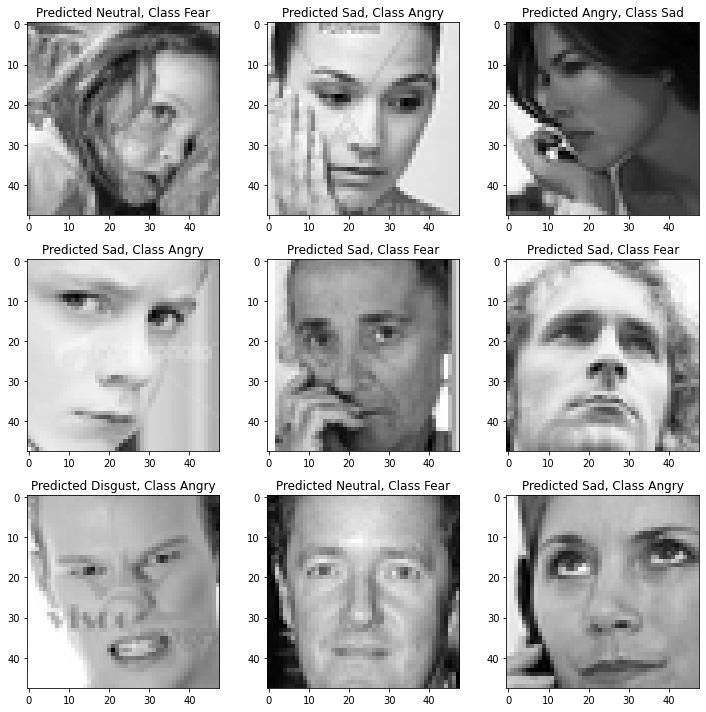

In [ ]:
fig = plt.figure(figsize=(10, 10))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(48,48), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(labels[y_pred[incorrect]], labels[y_test[incorrect]]))
plt.tight_layout()

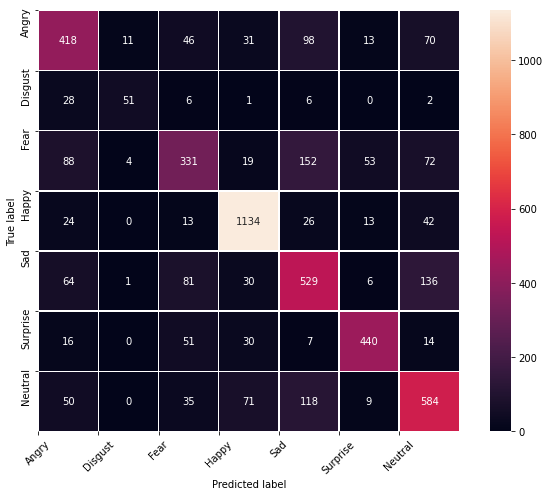

In [ ]:
#plot confusion matrix
cm = tf.math.confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(
    cm,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax,
)

#plot attributes
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [ ]:
#We obtained these values from confusion matrix using Precision, Recall and F1 formulas.
f1_scores = np.array([0.608, 0.63357, 0.5164, 0.8832, 0.59342, 0.80586, 0.6562])

In [ ]:
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
pd.DataFrame(f1_scores, index=labels, columns=['f1_scores'])

,f1_scores
Angry,0.60800
Disgust,0.63357
Fear,0.51640
Happy,0.88320
Sad,0.59342
Surprise,0.80586
Neutral,0.65620
